<a href="https://colab.research.google.com/github/ashleyak7/MSCI-151-week-1-workshops/blob/main/week_8_MSCI151_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/sample_data/Global_Policy_Uncertainty_Data.xlsx'
df = pd.read_excel(file_path)

In [2]:
display(df.head())

,Year,Month,GEPU_current,GEPU_ppp,US
0,1997,2.0,76.104192,75.664773,0.948914
1,1997,3.0,66.568757,64.209641,-4.278444
2,1997,4.0,71.689527,71.701273,6.463451
3,1997,5.0,75.359957,82.298050,4.594093
4,1997,6.0,79.496588,83.000374,4.662390


# Task
Perform a linear regression analysis on the `df` DataFrame to investigate the relationship between 'US' (dependent variable) and 'GEPU_ppp' (independent variable), including data preparation, model fitting, displaying the regression summary, and visualizing the results with a scatter plot and regression line.

## Prepare Data for Regression

### Subtask:
Select the 'US' and 'GEPU_ppp' columns from the DataFrame and handle any potential missing values to ensure the data is ready for regression analysis.


**Reasoning**:
First, create a new DataFrame with only the 'US' and 'GEPU_ppp' columns as specified in the instructions. Then, remove any rows with missing values in these columns to prepare the data for regression analysis and display the first few rows of the cleaned DataFrame.



In [3]:
df_regression = df[['US', 'GEPU_ppp']]
df_cleaned = df_regression.dropna()

print("Original DataFrame shape:", df.shape)
print("Regression DataFrame shape (selected columns):")
display(df_regression.head())
print("Cleaned DataFrame shape (after dropping NaNs):")
display(df_cleaned.head())

Original DataFrame shape: (346, 5)
Regression DataFrame shape (selected columns):


,US,GEPU_ppp
0,0.948914,75.664773
1,-4.278444,64.209641
2,6.463451,71.701273
3,4.594093,82.298050
4,4.662390,83.000374


Cleaned DataFrame shape (after dropping NaNs):


,US,GEPU_ppp
0,0.948914,75.664773
1,-4.278444,64.209641
2,6.463451,71.701273
3,4.594093,82.298050
4,4.662390,83.000374


## Run Linear Regression Model

### Subtask:
Fit a linear regression model using `statsmodels`, with 'US' as the dependent variable and 'GEPU_ppp' as the independent variable, including an intercept.


**Reasoning**:
To fit the linear regression model, I will import `statsmodels.api`, define the dependent and independent variables from the `df_cleaned` DataFrame, add an intercept to the independent variable, and then create and fit the OLS model.



In [4]:
import statsmodels.api as sm

y = df_cleaned['US']
X = df_cleaned['GEPU_ppp']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("Linear regression model fitted successfully.")

Linear regression model fitted successfully.


## Display Regression Summary

### Subtask:
Display the full summary of the fitted linear regression model to examine its statistical properties, coefficients, and R-squared value.

**Reasoning**:
To display the full summary of the fitted linear regression model, I will use the `.summary()` method on the `model` object, which contains all the regression results.



In [5]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3762
Date:                Tue, 18 Nov 2025   Prob (F-statistic):              0.540
Time:                        09:34:49   Log-Likelihood:                -995.66
No. Observations:                 344   AIC:                             1995.
Df Residuals:                     342   BIC:                             2003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4009      0.477      0.840      0.4

## Visualize Regression Results

### Subtask:
Create a scatter plot of 'GEPU_ppp' against 'US' from the cleaned data, and overlay the fitted linear regression line.

**Reasoning**:
To visualize the relationship and the fitted regression line, I need to create a scatter plot of the actual data points and then plot the predicted values from the `model` against the independent variable. I will use `matplotlib.pyplot` for this.



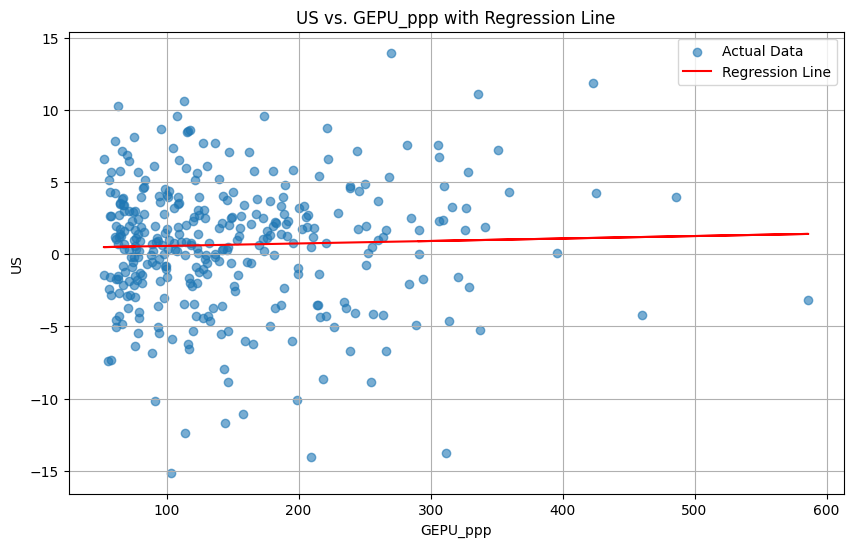

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['GEPU_ppp'], df_cleaned['US'], alpha=0.6, label='Actual Data')
plt.plot(df_cleaned['GEPU_ppp'], model.predict(X), color='red', label='Regression Line')

plt.title('US vs. GEPU_ppp with Regression Line')
plt.xlabel('GEPU_ppp')
plt.ylabel('US')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the regression analysis, including the strength and direction of the relationship between 'US' and 'GEPU_ppp', and the significance of the model.


## Summary:

### Q&A
*   **What are the key findings from the regression analysis regarding the strength and direction of the relationship between 'US' and 'GEPU\_ppp', and the significance of the model?**
    The linear regression analysis revealed a very weak and statistically insignificant relationship between 'US' (dependent variable) and 'GEPU\_ppp' (independent variable). The R-squared value was extremely low at 0.001, indicating that 'GEPU\_ppp' explains less than 0.1% of the variance in 'US'. The adjusted R-squared was negative (-0.002), further supporting a poor model fit. The F-statistic (0.3762) with a p-value of 0.540 confirms that the overall model is not statistically significant. The coefficient for 'GEPU\_ppp' was 0.0017, suggesting a tiny positive direction, but its p-value of 0.540 indicates that 'GEPU\_ppp' is not a significant predictor of 'US'. The intercept (0.4009) was also not statistically significant (p-value = 0.402).

### Data Analysis Key Findings
*   The original dataset `df` contained 346 rows and 5 columns.
*   No missing values were found in the 'US' and 'GEPU\_ppp' columns, as `df_cleaned` retained all 344 observations from the selected columns after `dropna()`.
*   The linear regression model shows a very weak relationship between 'US' and 'GEPU\_ppp', with an R-squared of 0.001, meaning only 0.1% of the variance in 'US' can be explained by 'GEPU\_ppp'.
*   The model is not statistically significant, as indicated by the F-statistic p-value of 0.540.
*   The coefficient for 'GEPU\_ppp' is 0.0017, but it is not statistically significant (p-value = 0.540), implying that changes in 'GEPU\_ppp' do not have a reliable linear effect on 'US'.
*   The visualization clearly shows a nearly flat regression line, reaffirming the lack of a strong linear relationship.

### Insights or Next Steps
*   Given the extremely weak and insignificant relationship, 'GEPU\_ppp' is not a suitable linear predictor for 'US' based on this analysis. It would be beneficial to explore other potential independent variables or alternative model specifications (e.g., non-linear relationships) that might have a stronger correlation with 'US'.
*   Further investigation could involve examining time-series properties of the data, as economic indicators often exhibit temporal dependencies, which a simple OLS model may not fully capture.
